In [ ]:
# インパルス応答から残響時間を求める

In [1]:
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import bisect
%matplotlib inline

In [2]:
#def sfread(fileName):
#   h, sampleRate = sf.read(fileName)
    
def calcR(h):
    hh = h*h
    numerator = denominator = hh.sum()
    R = np.array([])  # R(t)
    for v in hh:
        R = np.append(R, numerator / denominator)
        numerator -= v
    return R

def calcTime(R_dB, Threshold, sampleRate):
    T = []  # 初めて-th[dB]を下回る時刻
    for th in Threshold:
        if -th < R_dB[-1]:
            break
        T.append(bisect.bisect_right(-R_dB, th))
    RevTime = [t*60/Threshold[i]/sampleRate for i, t in enumerate(T)]
    return RevTime  # 単位は[s]
    
def view(R_dB, RevTime, Threshold, sampleRate):
    x = np.arange(len(R_dB))/sampleRate  # 単位は[s]
    plt.figure(figsize=(8,6))
    plt.plot(x, R_dB, label="R(t)")
    Y = []
    for t, th in zip(RevTime, Threshold):
        Y.append(x * (-60) / t)
        plt.plot([0, t*2], [0, -120], linewidth=1,
                 label="RT{}".format(th))

    xmax = min(8, max(RevTime) + 0.5)
    plt.hlines([0] + [-th for th in Threshold] + [-60], 
               xmin=0, xmax=xmax, linewidth=0.5, 
               linestyles="dashed")
    plt.title("Reverb Curve")
    plt.xlim(0, xmax)
    plt.ylim(-70, 10)
    plt.xlabel(r"Time [sec]")
    plt.ylabel("Level [dB]")
    plt.legend()


def doAll(h, sampleRate):
    R = calcR(h)
    R_dB = 10 * np.log10(R)  # 単位をdBに直す
    Threshold = [5, 10, 20, 30]  # 何dB減衰したときの値を用いて計算するか
    RevTime = calcTime(R_dB, Threshold, sampleRate)
    for t, th in zip(RevTime, Threshold):
        print("RT{0} * {1} = {2} [sec]".format(th, 60//th, t))
    view(R_dB, RevTime, Threshold, sampleRate)


In [18]:
h, sampleRate = sf.read("TPS_responce_0624.wav")

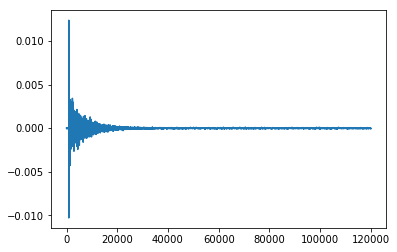

In [20]:
h = h[:120000]
plt.plot(h)

RT5 * 12 = 1.093 [sec]
RT10 * 6 = 1.165 [sec]
RT20 * 3 = 5.462375 [sec]
RT30 * 2 = 4.854791666666666 [sec]


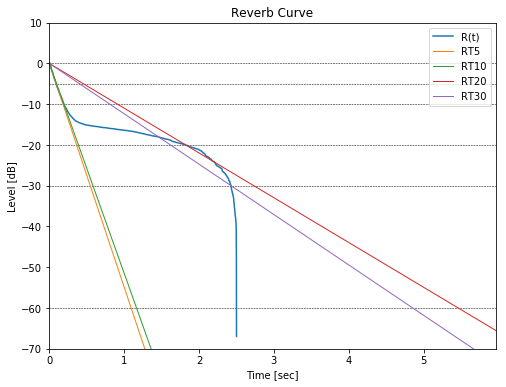

In [21]:
doAll(h, sampleRate)  # 元

In [29]:
h, sampleRate = sf.read("TPS_responce_0624_1.wav")

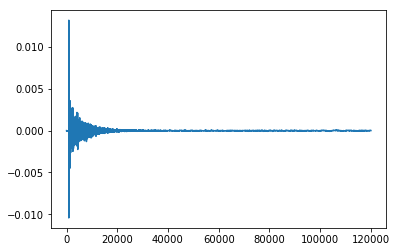

In [30]:
h = h[:120000]
plt.plot(h)

C:\Users\nagis\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10


RT5 * 12 = 0.96275 [sec]
RT10 * 6 = 0.999625 [sec]
RT20 * 3 = 4.81675 [sec]
RT30 * 2 = 4.743875 [sec]


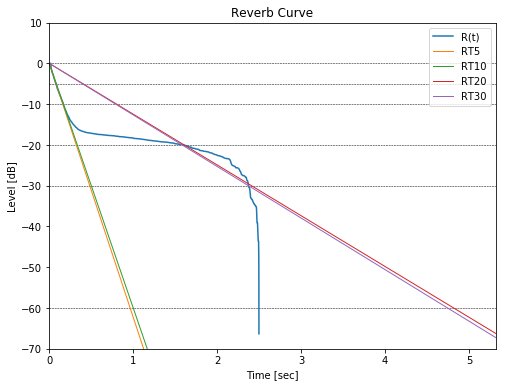

In [31]:
doAll(h, sampleRate)  # 吸音材